In [1]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
import statsmodels.formula.api as st
import math
import pandas as pd
import statsmodels as sm
import statsmodels.graphics.regressionplots
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Downloading, joining and leaving only the columns that interest us in the Data.

In [2]:
df = pd.read_csv("MassShootings.csv")

In [3]:
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [4]:
df1 = pd.read_csv("TotalPopulation.csv")

In [5]:
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [6]:
data = pd.merge(df, df1, right_on="Country Name", left_on="Country")

In [7]:
data.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Australia,15.0,4,Australia,AUS,"Population, total",SP.POP.TOTL,10276477.0,10483000.0,10742000.0,...,20827600.0,21249200.0,21691700.0,22031750.0,22340024.0,22728254.0,23117353.0,23460694.0,23789338.0,24127159.0
1,Austria,30.4,1,Austria,AUT,"Population, total",SP.POP.TOTL,7047539.0,7086299.0,7129864.0,...,8295487.0,8321496.0,8343323.0,8363404.0,8391643.0,8429991.0,8479375.0,8541575.0,8633169.0,8747358.0
2,Canada,30.8,4,Canada,CAN,"Population, total",SP.POP.TOTL,17909009.0,18271000.0,18614000.0,...,32887928.0,33245773.0,33628571.0,34005274.0,34342780.0,34750545.0,35155451.0,35544564.0,35848610.0,36286425.0
3,Denmark,12.0,0,Denmark,DNK,"Population, total",SP.POP.TOTL,4579603.0,4611687.0,4647727.0,...,5461438.0,5493621.0,5523095.0,5547683.0,5570572.0,5591572.0,5614932.0,5643475.0,5683483.0,5731118.0
4,Finland,45.3,2,Finland,FIN,"Population, total",SP.POP.TOTL,4429634.0,4461005.0,4491443.0,...,5288720.0,5313399.0,5338871.0,5363352.0,5388272.0,5413971.0,5438972.0,5461512.0,5479531.0,5495096.0


In [8]:
data = data [['Country', 'Guns/100 inhabitants', "Number of mass shootings", "Country Name", "2012"]]

In [9]:
df2 = pd.read_csv("GDP.csv")

In [10]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041160e+11,1.153980e+11,1.249120e+11,1.267770e+11,1.029620e+11,8.963316e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN


In [11]:
df2["2012GDP"] = df2["2012"]

In [12]:
df2 = df2[["Country Name", "2012GDP"]]

In [13]:
df2.head()

,Country Name,2012GDP
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153980e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [14]:
data = pd.merge(data, df2, right_on="Country Name", left_on="Country")

In [15]:
data.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Country Name_x,2012,Country Name_y,2012GDP
0,Australia,15.0,4,Australia,22728254.0,Australia,1.538190e+12
1,Austria,30.4,1,Austria,8429991.0,Austria,4.074520e+11
2,Canada,30.8,4,Canada,34750545.0,Canada,1.824290e+12
3,Denmark,12.0,0,Denmark,5591572.0,Denmark,3.271490e+11
4,Finland,45.3,2,Finland,5413971.0,Finland,2.567060e+11


In [16]:
df3 = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv")

In [17]:
df3.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [18]:
df3 = df3[["Country/Territory", "Number of homicides by firearm", "Average total all civilian firearms"]]

In [19]:
data = pd.merge(data, df3, right_on="Country/Territory", left_on="Country")

In [20]:
data.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Country Name_x,2012,Country Name_y,2012GDP,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Australia,15.0,4,Australia,22728254.0,Australia,1.538190e+12,Australia,30.0,3050000.0
1,Austria,30.4,1,Austria,8429991.0,Austria,4.074520e+11,Austria,18.0,2500000.0
2,Canada,30.8,4,Canada,34750545.0,Canada,1.824290e+12,Canada,173.0,9950000.0
3,Denmark,12.0,0,Denmark,5591572.0,Denmark,3.271490e+11,Denmark,15.0,650000.0
4,Finland,45.3,2,Finland,5413971.0,Finland,2.567060e+11,Finland,24.0,2400000.0


# Doing plot of GDP vs Number of mass shooting with error bar

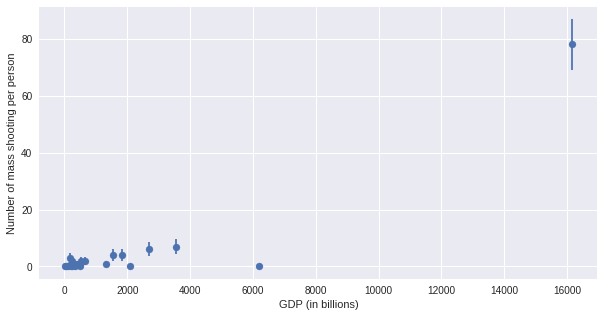

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [21]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(data["2012GDP"] / 1e9, data['Number of mass shootings'])
ax.errorbar(data["2012GDP"] / 1e9, data['Number of mass shootings'], 
            yerr = np.sqrt(data['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")



In [22]:
len(data["Country"])

22

# Doing plot of population vs Number of mass shooting with error bar

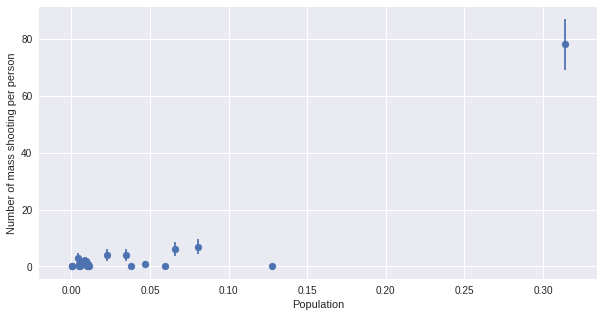

In [23]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(data["2012"] / 1e9, data['Number of mass shootings'])
ax.errorbar(data["2012"] / 1e9, data['Number of mass shootings'], 
            yerr = np.sqrt(data['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("Population")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()




# Visualizing number of guns per 100 people by country

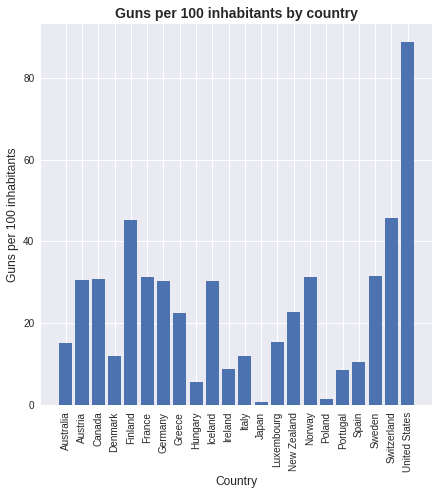

In [24]:
N = len(data["Guns/100 inhabitants"])
x = range(N)
labels = [data["Country"][0], data["Country"][1], data["Country"][2], data["Country"][3], data["Country"][4], data["Country"][5], data["Country"][6], data["Country"][7], data["Country"][8], data["Country"][9], data["Country"][10], data["Country"][11], data["Country"][12], data["Country"][13], data["Country"][14], data["Country"][15], data["Country"][16], data["Country"][17], data["Country"][18], data["Country"][19], data["Country"][20], data["Country"][21]]


plt.figure(figsize=(7,7))
plt.xticks(x, labels)
plt.xticks(rotation=90)
plt.bar(x, data["Guns/100 inhabitants"], align="center")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Guns per 100 inhabitants", fontsize=12)
plt.title("Guns per 100 inhabitants by country", weight='bold', fontsize=14)




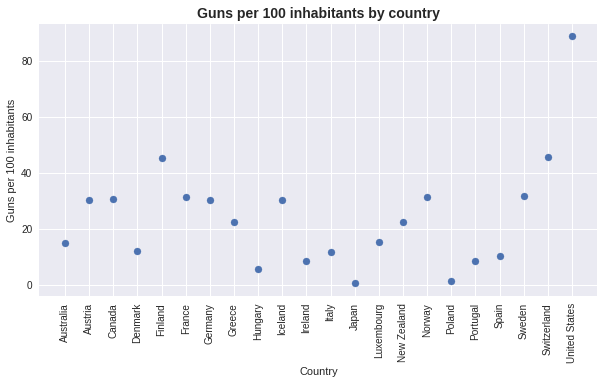

In [25]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(x, data['Guns/100 inhabitants'])
ax.set_xlabel("Country")
ax.set_ylabel("Guns per 100 inhabitants")
ax.set_ylim()
pl.xticks(x, labels)
pl.xticks(rotation=90)
plt.title("Guns per 100 inhabitants by country", weight='bold', fontsize=14)
pl.show()

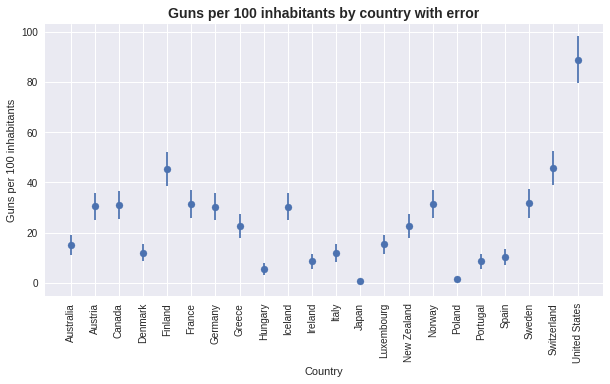

In [26]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(x, data['Guns/100 inhabitants'])
ax.errorbar(x, data['Guns/100 inhabitants'], 
            yerr = np.sqrt(data['Guns/100 inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel("Country")
ax.set_ylabel("Guns per 100 inhabitants")
ax.set_ylim()
pl.xticks(x, labels)
pl.xticks(rotation=90)
plt.title("Guns per 100 inhabitants by country with error", weight='bold', fontsize=14)
pl.show()

## Visualizing outliers based on the previous analysis using a boxplot

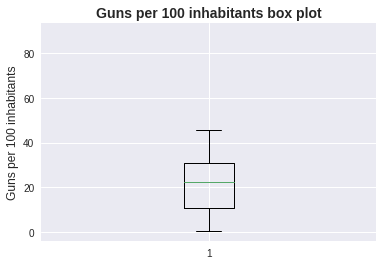

In [27]:
plt.boxplot(data["Guns/100 inhabitants"])

plt.ylabel("Guns per 100 inhabitants", fontsize=12)
plt.title("Guns per 100 inhabitants box plot", weight='bold', fontsize=14)

## Looking at the previous graphs it looks like there is a clear outlier, which is the USA

# New analysis, looking at the number of homicides by firearm per capita.

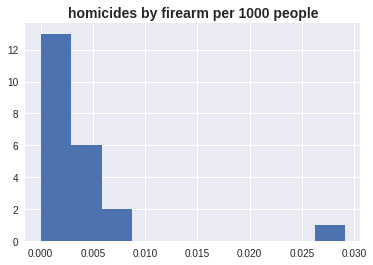

In [28]:
fig, ax = plt.subplots()
ax.hist(data['Number of homicides by firearm'] / data['2012'] * 1000)
plt.title('homicides by firearm per 1000 people', weight='bold', fontsize=14)

## homicides by firearm per 1000 people against the country GDP, with statistical errors. 

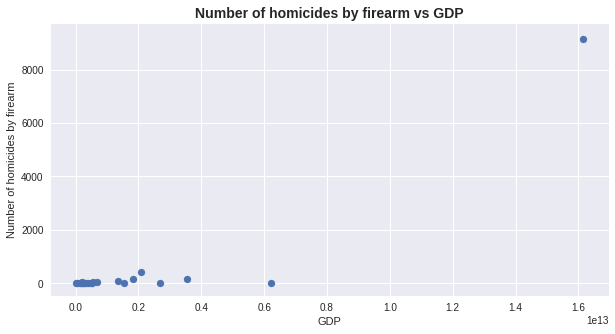

In [29]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(data["2012GDP"], data['Number of homicides by firearm'])
ax.errorbar(data["2012GDP"], data['Number of homicides by firearm'], 
            yerr = np.sqrt(data['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.set_xlabel("GDP")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
plt.title("Number of homicides by firearm vs GDP", weight='bold', fontsize=14)
pl.show()

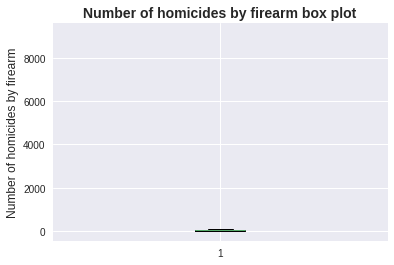

In [30]:
plt.boxplot(data["Number of homicides by firearm"])

plt.ylabel("Number of homicides by firearm", fontsize=12)
plt.title("Number of homicides by firearm box plot", weight='bold', fontsize=14)

## There seems to be an outlier, which is again the USA.

# Number of homicides by firearm vs Number of civilians with firearms

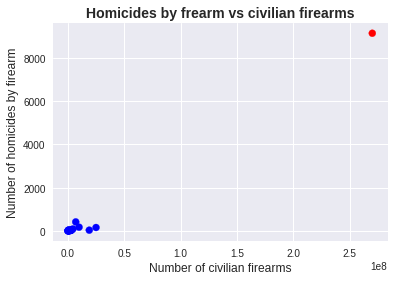

In [31]:
col = []

for i in range (0, len(data)):
    if data.Country[i] == "United States":
        col.append("r")
    else:
        col.append("b")

pl.scatter(data["Average total all civilian firearms"], data["Number of homicides by firearm"], color = col)

plt.xlabel("Number of civilian firearms", fontsize=12)
plt.ylabel("Number of homicides by firearm", fontsize=12)
plt.title("Homicides by frearm vs civilian firearms", weight='bold', fontsize=14)

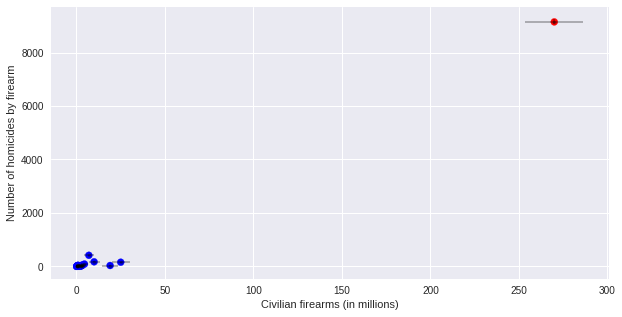

In [32]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter (data["Average total all civilian firearms"]/1e6, data["Number of homicides by firearm"],color=col)


ax.errorbar(data["Average total all civilian firearms"]/1e6,data["Number of homicides by firearm"], xerr= np.sqrt(data["Average total all civilian firearms"]/1e6) ,
           yerr = np.sqrt(data["Number of homicides by firearm"] * 1.0), fmt = '.',color="black", alpha=0.3)

ax.set_ylabel('Number of homicides by firearm')
ax.set_xlabel("Civilian firearms (in millions)")
ax.set_ylim()
pl.show()

# Number of mass shootings vs Number of civilians with firearms

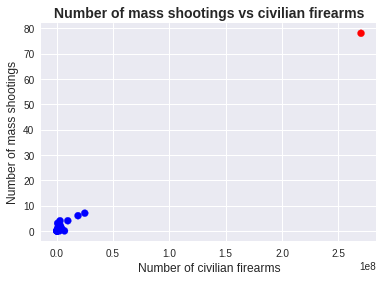

In [33]:
pl.scatter(data["Average total all civilian firearms"], data["Number of mass shootings"], color = col)

plt.xlabel("Number of civilian firearms", fontsize=12)
plt.ylabel("Number of mass shootings", fontsize=12)
plt.title("Number of mass shootings vs civilian firearms", weight='bold', fontsize=14)

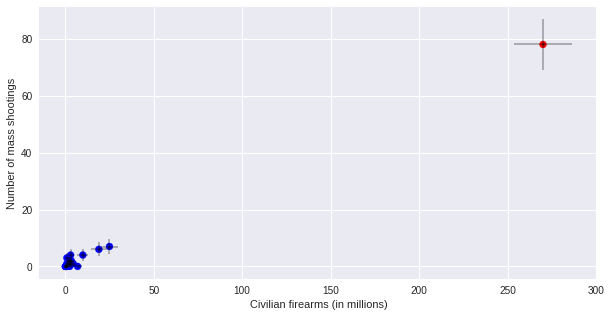

In [34]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter (data["Average total all civilian firearms"]/1e6, data["Number of mass shootings"],color=col)


ax.errorbar(data["Average total all civilian firearms"]/1e6,data["Number of mass shootings"], xerr= np.sqrt(data["Average total all civilian firearms"]/1e6) ,
           yerr = np.sqrt(data["Number of mass shootings"] * 1.0), fmt = '.',color="black", alpha=0.3)

ax.set_ylabel('Number of mass shootings')
ax.set_xlabel("Civilian firearms (in millions)")
ax.set_ylim()
pl.show()

# Fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

In [35]:
data["MassShootPerPerson"] = (data["Number of mass shootings"] * 1000000) / (data["2012"])
data["FirearmsPerPerson"] = data["Average total all civilian firearms"] / data["2012"]

/opt/rh/anaconda/root/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


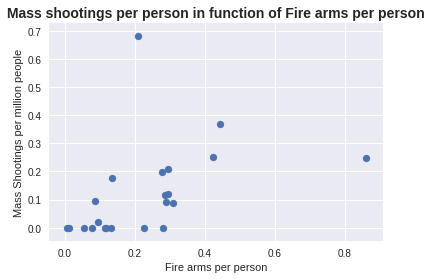

In [36]:
plt.scatter("FirearmsPerPerson", "MassShootPerPerson", data = data, label = "")
plt.xlabel("Fire arms per person")
plt.ylabel("Mass Shootings per million people")
plt.legend()
plt.title("Mass shootings per person in function of Fire arms per person", weight='bold', fontsize=14)

In [37]:
model = st.ols(formula = "MassShootPerPerson ~ FirearmsPerPerson", data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MassShootPerPerson   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Mon, 16 Oct 2017   Prob (F-statistic):             0.0374
Time:                        15:47:44   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0315      0.051      0.612      0.548      -0.076       0.139
FirearmsPerPerson     0.3911      0.175      2.230      0.037       0.025       0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

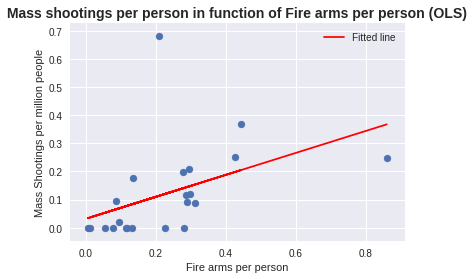

In [38]:
W1 = model.params[1]
W2 = model.params[0] 

data.loc[:,"pred"]=W1*data["FirearmsPerPerson"] + W2

plt.scatter("FirearmsPerPerson", "MassShootPerPerson", data = data, label = "")
plt.plot(data["FirearmsPerPerson"], data.pred, c="r", label = "Fitted line")
plt.xlabel("Fire arms per person")
plt.ylabel("Mass Shootings per million people")
plt.legend()
plt.title("Mass shootings per person in function of Fire arms per person (OLS)", weight='bold', fontsize=14)

In [39]:
model1 = sm.regression.linear_model.WLS(data["MassShootPerPerson"], data["FirearmsPerPerson"], 1/abs(model.resid)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:     MassShootPerPerson   R-squared:                       0.715
Model:                            WLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     52.61
Date:                Mon, 16 Oct 2017   Prob (F-statistic):           3.82e-07
Time:                        15:47:44   Log-Likelihood:                 25.229
No. Observations:                  22   AIC:                            -48.46
Df Residuals:                      21   BIC:                            -47.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
FirearmsPerPerson     0.4351      0.060      7.253      0.000       0.310       0.560
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.837
Skew:                           0.879   Prob(JB):                        0.242
Kurtosis:                       2.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# In order to fix the problem with the wls model we only used the absolute values of the errors as weight because the values have to be possitive. 

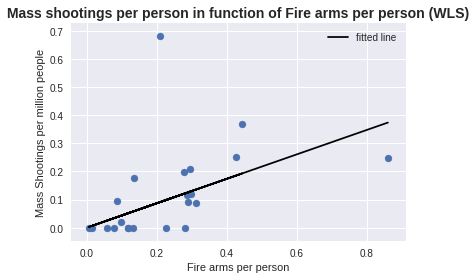

In [40]:
w1 = model1.params[0]

data.loc[:,"pred1"]=w1*data["FirearmsPerPerson"]

plt.scatter("FirearmsPerPerson", "MassShootPerPerson", data = data, label = "")
plt.plot(data["FirearmsPerPerson"], data.pred1, c="k", label = "fitted line")
plt.xlabel("Fire arms per person")
plt.ylabel("Mass Shootings per million people")
plt.legend()
plt.title("Mass shootings per person in function of Fire arms per person (WLS)", weight='bold', fontsize=14)

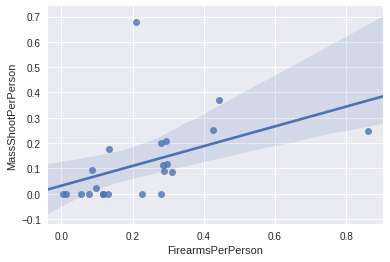

In [41]:
sns.regplot("FirearmsPerPerson", "MassShootPerPerson", data = data)

# Discuss your findings.

### The US seems to be an extreme case of civilians with firearms and mass shootings.

When looking at the different graphics, you can see that the USA in relation to other 21 countries has an extreme behaviour in terms of gun ownership, mass shootings and civilians killed by firearms. This of course brings us to the ongoing debate about gun control in america, whith the data given it certainly looks like regulating the ownership of guns will have a significant reduction on the amount of civilians killed by firearms and mass shootings.

### Regression models.

Continueing with the previous line of argument, the OLS and WLS models that you can explain the amount of mass shootings with the amount of firearms per person in a country, both models have statical significance (95% confidence level) and a relatively powerful R2 (0.2 for the OLS and 0.48 for the WLS). These results leads one to think that reducing the amount of civilians with firearms will lead to a decrease in mass shootings. 

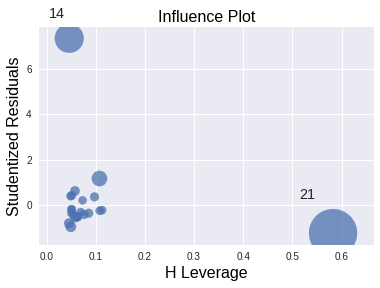

In [42]:
statsmodels.graphics.regressionplots.influence_plot(model, alpha  = 0.05, criterion="cooks");